In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scipy

# Don't print to much elements when printing arrays
np.set_printoptions(threshold=8) 

# load data
df = pd.read_csv('./smartphone-typing.csv')
# compute cps - typing speed(characters per second)
df['cps'] = df.apply(lambda x: x['n_letters'] / x['trialtime'] * 1000, axis=1)

# get the number of young sample
young_sample = df[df['age_group']=='young'];
len_young_sample = len(young_sample)
print(f"the number of young sample: {len_young_sample}")

# get the number of old sample
old_sample = df[df['age_group']=='old'];
len_old_sample = len(old_sample)
print(f"the number of old sample: {len_old_sample}")

# test the size of sample
print("is Equal:", len_young_sample==len_old_sample)

young_cps = young_sample['cps']
old_cps = old_sample['cps']
# test the normal distribution of young
young_p_value = scipy.stats.normaltest(young_cps)[1]
print('distrubution is normal=', young_p_value, young_p_value > 0.05)
# test the normal distribution of old
old_p_value = scipy.stats.normaltest(old_cps)[1]
print('distrubution is normal=', old_p_value > 0.05)



fig, axes = plt.subplots(ncols=2, figsize=(16, 4))
# Plot the histogram
ax = axes[0]
sns.histplot(young_cps, ax=ax, color="C0", kde=False, linewidth=0, alpha=0.5, stat="density")
sns.histplot(old_cps, ax=ax, color="C1", kde=False, linewidth=0, alpha=0.5, stat="density")

# Set the axis labels
ax.set_ylabel("density")
ax.set_xlabel("value")

# Plot the barplot
ax = axes[1]
sns.barplot(x="age_group", y="cps", ax=ax, data=df, ci="sd")

plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './smartphone-typing.csv'

In [8]:
# Use Welch's t-test
t, p = stats.ttest_ind(young_cps, old_cps, equal_var=False)

# Print the result
print(f"t={t}, p={p}")

# Set the threshold 
thr = 0.05

# Print the results
print(f"can reject={p < thr}")

t=27.550281982397763, p=1.852876668781571e-121
can reject=True


In [9]:
# Compute the Mann-Whitney U
# Note: the default option is deprecated
# Remember to use the argument "alternative='two-sided'"
u, p = stats.mannwhitneyu(young_cps, old_cps, alternative='two-sided')

# Print the results
print(f"u = {u}, p={p}")

print(f"can reject={p < thr}")

u = 225296.5, p=1.5932413559264853e-122
can reject=True


1000


<AxesSubplot:ylabel='Density'>

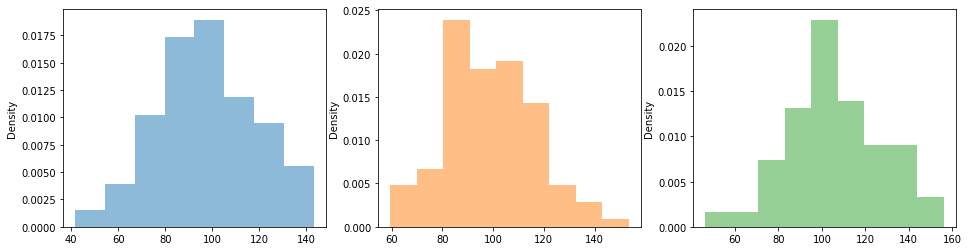

In [28]:
# Seed the random number generator
np.random.seed(3)

fig, axes = plt.subplots(ncols=3, figsize=(16, 4))
# data set A
A = []
# repeated sampling
for i in range(1000):
    list = np.random.normal(loc = 100, scale = 20, size = 100)
    A.append(list)

sns.histplot(A[0], ax=axes[0], color="C0", linewidth=0, alpha=0.5, stat="density")
sns.histplot(A[1], ax=axes[1], color="C1", linewidth=0, alpha=0.5, stat="density")
sns.histplot(A[2], ax=axes[2], color="C2", linewidth=0, alpha=0.5, stat="density")

1000


<AxesSubplot:ylabel='Count'>

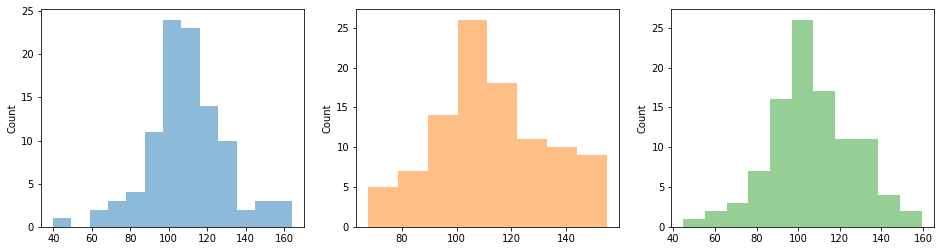

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

B = []
for i in range(1000):
    list = np.random.normal(loc = 110, scale = 20, size = 100)
    B.append(list)

print(len(A))
# sns.distplot(A[0], color="C0",hist=True, kde=False)
# sns.distplot(A[1], color="C1",hist=True, kde=False)
# sns.distplot(A[2], color="C2",hist=True, kde=False)
# Generate a sample
# x1 = np.random.normal(100, scale=20, size=100)
sns.histplot(B[0], ax=axes[0], color="C0",linewidth=0, alpha=0.5)
# x2 = np.random.normal(100, scale=20, size=100)
sns.histplot(B[1], ax=axes[1], color="C1",linewidth=0, alpha=0.5)
# x3 = np.random.normal(100, scale=20, size=100)
sns.histplot(B[2], ax=axes[2], color="C2",linewidth=0, alpha=0.5)

In [31]:
# sample mean value  of A
mean_A = []
mean_B = []
for i in range(1000):
    mean_A.append(A[i].mean())
    mean_B.append(B[i].mean())

<AxesSubplot:ylabel='Count'>

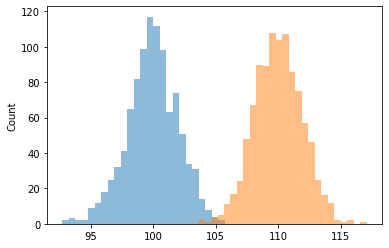

In [32]:
sns.histplot(mean_A, color="C0", linewidth=0, alpha=0.5)
sns.histplot(mean_B, color="C1", linewidth=0, alpha=0.5)

In [22]:
num_false_nagetive = 0
thr = 0.05

for i in range(1000):
    # Run a Student's t-test
    t, p = stats.ttest_ind(A[i], B[i], equal_var=True)
    if p > thr:
        num_false_nagetive+=1
        
print(num_false_nagetive / 1000)

0.049
